In [1]:
import numpy as np ; import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from seedtools  import load_seed
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## CONTENTS 
- About Outliers 

## About Outliers

**what are outliers** ?  <br /> 
=> these are datapoints that behave differently from most of  data points kind of a outcast 

**To remove them or remain them** ?  <br />

- to remove or to mention it depends on the situation 
- someone's age cant be greater than 300 it is a outlier 
- but in anamoly detection e have to capture outliers as are features

**Their Effects** : 

| Bad Effects | Not much Effects |
|----------|----------|
| Linear Regression     |  Decision tress     | 
| Logistic Regression    | Random forest     | 
| AdaBoost   | XgBoost |
|deep learning weights | | --


**How to treat them** ? 
- trimming => just remove them 
- capping => fx(max,min) => cap(90,1)  =>   $x_i= \begin{cases}
90 & \text{if } x_i \geq 90 \\
x_i & \text{if } 1 < x_i < 90 \\
1  & \text{if } x_i \leq 1
\end{cases}$
- (less used) =>  discretization =>  convert them to bins so outliers will be in range 90-100



**Mathematical Formulation**: 

1)  Normal dist <br />
 $x_i > (\mu  +  3\sigma )$  and  $x_i < (\mu  - 3\sigma)$

2) skewed data <br />
  $x_i > (Q_3 + 1.5 \times \text{IQR})$ and   $x_i <  (Q_1 - 1.5 \times \text{IQR})$
3) Other Dist  <br />
  $x_i$ > nth percentile and  $x_i$ < mth percentile (u decide its custom)



**Methods of detection and removal** : 

-  Z score => trim || cap
-  IQR method =>  trim ||  cap
-  percentile method => trip || cap(winsorization)

## Z Score Method

Under it mathematically we can do two things(they are same things ) : 

1) calculate $x_i > \mu + 3\sigma$ and  $ x_i < \mu- 3\sigma$
 <center> OR </center>
 
2) Calculate Z-score: $z_i = \frac{x_i - \mu}{\sigma}$  and check values $x_i >  3$ and $ x_i < -3$

Its mathematical formulation for greater than : 

##### $x_i >= \mu + 3\sigma$ <br />

##### **$\frac{x_i - \mu}{\sigma} >3$**



In [2]:
data = load_seed("placement_placed.csv",quiet=False).data 

print("cgpa shape : ",data["cgpa"].shape)
print("marks shape :",data["placement_exam_marks"].shape)

cgpa shape :  (1000,)
marks shape : (1000,)


C:\Users\RISHABH\AppData\Roaming\Python\Python311\site-packages\seedtools\seed_file.py:190: UserWarning: SEED FILE IS NOT CONFIGURED YET , CONFIGURE IT USING `register` and `register_version`
  warnings.warn("SEED FILE IS NOT CONFIGURED YET , CONFIGURE IT USING `register` and `register_version`")


Text(0.5, 1.0, 'Marks boxplot')

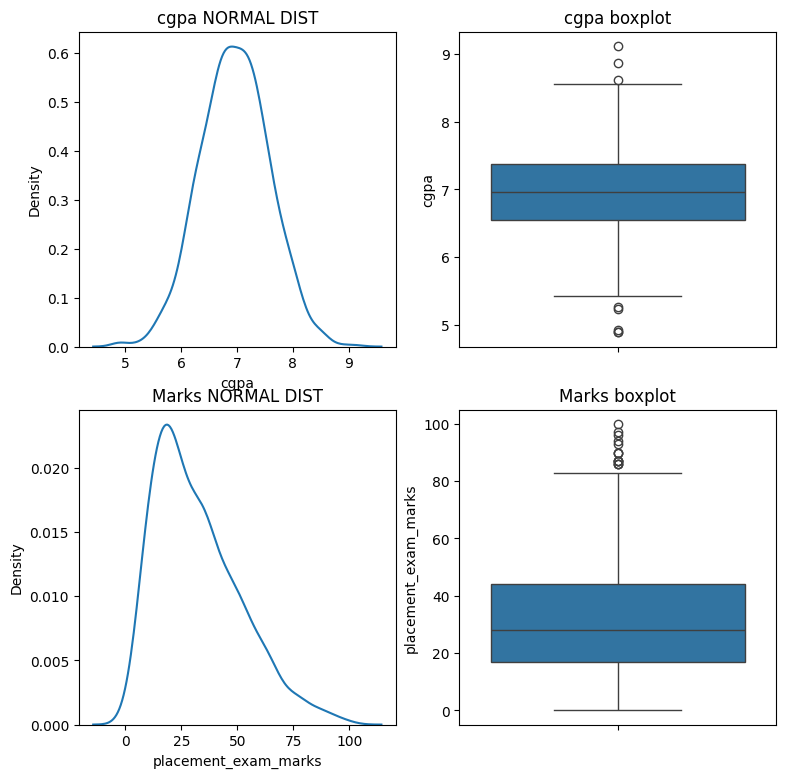

In [3]:
plt.figure(figsize=(9,9))


plt.subplot(2,2,1)
sns.kdeplot(data["cgpa"])
plt.title("cgpa NORMAL DIST")

plt.subplot(2,2,2)
sns.boxplot(data["cgpa"])
plt.title("cgpa boxplot")

plt.subplot(2,2,3)
sns.kdeplot(data["placement_exam_marks"])
plt.title("Marks NORMAL DIST")

plt.subplot(2,2,4)
sns.boxplot(data["placement_exam_marks"])
plt.title("Marks boxplot")

**Although `age` is more normally distributed but both have outliers and `marks` is rightly skewed**

In [4]:
highest_value = data["cgpa"].mean() +  3*data["cgpa"].std()
lowest_value =  data["cgpa"].mean() -  3*data["cgpa"].std()
print("Highest Value  for cgpa: ",highest_value)
print("Lowest Value  for cgpa : ",lowest_value)
print("-"*50)
highest_value_ = data["placement_exam_marks"].mean() +  3*data["placement_exam_marks"].std()
lowest_value_ =  data["placement_exam_marks"].mean() -  3*data["placement_exam_marks"].std()
print("Highest Value for marks : ",highest_value_)
print("Lowest Value for marks  : ",lowest_value_)

Highest Value  for cgpa:  8.808933625397168
Lowest Value  for cgpa :  5.113546374602832
--------------------------------------------------
Highest Value for marks :  89.61746701676336
Lowest Value for marks  :  -25.16746701676336


In [5]:
print("Outliers of cgpa column")
outliers_cgpa = data[(data["cgpa"] >  highest_value) |  (data["cgpa"] < lowest_value)]
print("Outliers shape :",outliers_cgpa.shape)
outliers_cgpa

Outliers of cgpa column
Outliers shape : (5, 3)


,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [10]:
print("Outliers of marks column")
outliers = data[(data["placement_exam_marks"] >  highest_value_) |  (data["placement_exam_marks"] < lowest_value_)]
print("Outliers shape :",outliers.shape)
outliers

Outliers of marks column
Outliers shape : (8, 3)


,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
134,6.33,93.0,0
162,7.80,90.0,0
324,6.64,90.0,0
630,6.56,96.0,1
730,6.14,90.0,1
846,6.99,97.0,0
917,5.95,100.0,0


### Trimming 

In [8]:
cgpa_new  =  data[(data["cgpa"] < highest_value) &  (data["cgpa"] >  lowest_value)]
print("shape of cgpa new : ",cgpa_new.shape)
cgpa_new.head()

shape of cgpa new :  (995, 3)


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [11]:
marks_new  =  data[(data["placement_exam_marks"] < highest_value_) &  (data["placement_exam_marks"] >  lowest_value_)]
print("shape of marks new : ",marks_new.shape)
marks_new.head()

shape of marks new :  (992, 3)


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


### Capping 

In [17]:
data["cgpa_new"] = np.where(
    data['cgpa']> highest_value,
    highest_value,
    np.where(
        data['cgpa']< lowest_value,
        lowest_value,
        data['cgpa']
    )
)
print("shape of cgpa new : ",cgpa_new.shape)
data["cgpa_new"].head()

shape of cgpa new :  (1000,)


0    7.19
1    7.46
2    7.54
3    6.42
4    7.23
Name: cgpa_new, dtype: float64

In [18]:
data["marks_new"] = np.where(
    data['placement_exam_marks']> highest_value_,
    highest_value_,
    np.where(
        data['placement_exam_marks']< lowest_value_,
        lowest_value_,
        data['placement_exam_marks']
    )
)
print("shape of marks new : ",cgpa_new.shape)
data["marks_new"].head()

shape of marks new :  (1000,)


0    26.0
1    38.0
2    40.0
3     8.0
4    17.0
Name: marks_new, dtype: float64

## IQR Method 

**Same procedure but finding way of upper and lower limit is diff **

In [28]:
percentile25 = data["placement_exam_marks"].quantile(0.25)
percentile75 = data['placement_exam_marks'].quantile(0.75)
iqr = percentile75 - percentile25

In [31]:

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

upper_limit,lower_limit

(84.5, -23.5)

## Percentile method 

take a percentile like `1 percentile` and data `above and equal 99` and `below and equal 1` will become outlier

In [30]:
## taking 0.01 

upper_limit = data['cgpa'].quantile(0.99)
lower_limit = data['cgpa'].quantile(0.01)
upper_limit,lower_limit

(8.4201, 5.5596)